# Dendrograms

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## 1. Choose vectors

In [237]:
# Choose vector to use
doc_vectors = reduced_features_tfidf

# For title 
vec_type = 'ACP'
vec_opt = n_components

In [247]:
dist_tresh = 0.6

In [248]:
model = AgglomerativeClustering(None,affinity='cosine',linkage = 'complete',compute_full_tree=True,distance_threshold=dist_tresh).fit(doc_vectors)
# model = AgglomerativeClustering(100,affinity='cosine',linkage = 'complete',compute_full_tree=True).fit(nmf_doc_vectors)

In [249]:
labels = model.labels_
nb_clusts = model.n_clusters_
print(nb_clusts)

109


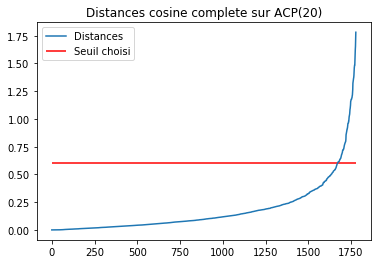

In [250]:
plt.plot(model.distances_,label= 'Distances')
plt.hlines(dist_tresh,0,1780,'red',label='Seuil choisi')
plt.title("Distances {} {} sur {}({})".format(metric, method, vec_type,vec_opt))
plt.legend()

## 3. Choose one dendrogram

Text(0.5, 1.0, 'Dendrogramme cosine complete sur ACP(20)')

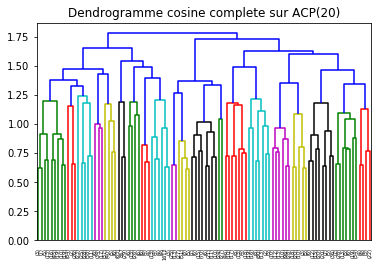

In [251]:
metric = 'cosine'
method = 'complete'
Z = linkage(doc_vectors,metric=metric,method = method);
# dendrogram(Z,p=0.9,truncate_mode = 'level',color_threshold=0.1);
dendrogram(Z,p=100,truncate_mode = 'lastp');
plt.title("Dendrogramme {} {} sur {}({})".format(metric, method, vec_type,vec_opt))

In [252]:
# Embedding umap
embedding = UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(doc_vectors)

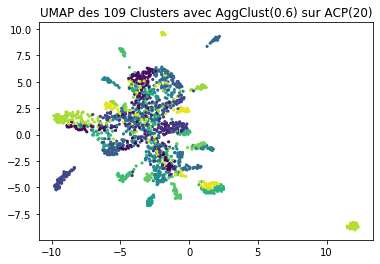

In [253]:
# Affichage
plt.scatter(embedding[:, 0], embedding[:, 1], 
    c = labels,
    s = 10, # size
    edgecolor='none')
plt.title("UMAP des {} Clusters avec AggClust({}) sur {}({})".format(nb_clusts,dist_tresh,vec_type,vec_opt));

In [217]:
# Scores
print("Nb clusters = {},Calisnki-Harabasz = {:.2f}, Davies-Bouldin = {:.2f}".format(
    nb_clusts,
    calinski_harabasz_score (doc_vectors ,labels),
    davies_bouldin_score (doc_vectors ,labels)))

Nb clusters = 297,Calisnki-Harabasz = 26.93, Davies-Bouldin = 1.14


## 2. Generate multiple dendrograms

In [159]:
# Choose metrics and methods
metrics = ['euclidean','cosine']
methods = ['complete','single','average']

euclidean, complete ...  ok 
euclidean, single ...  ok 
euclidean, average ...  ok 
cosine, complete ...  ok 
cosine, single ...  ok 
cosine, average ...  ok 


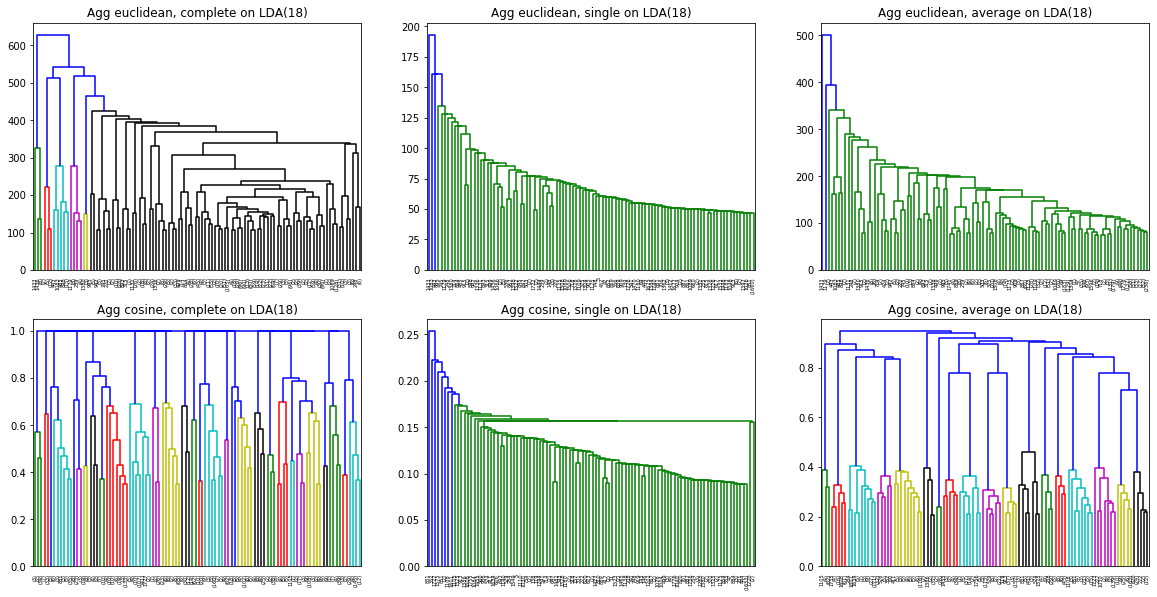

In [160]:
# Run and show
fig,axes = plt.subplots(len(metrics),len(methods),figsize = (20,10))
for ic,metric in enumerate(metrics):
    for ih,method in enumerate(methods):
        print("{}, {} ...".format(metric,method),end = ' ')
        Z = linkage(doc_vectors,metric=metric,method = method);
        dendrogram(Z,p=100,truncate_mode = 'lastp',ax = axes[ic,ih])
        axes[ic,ih].set_title('Agg {metric}, {linkage} on {vectype}({vec_opt})'.\
            format(vectype = vec_type, vec_opt = vec_opt,metric=metric, linkage = method))
        print(' ok ')